# Splines for a smooth surface approximation

This section will describe how to use cubic splines so we can have a $C^1$ surface approximation.

Just as a reminder, the main goal at the moment has been to accurately compute boundary integrals:

$$ u(x) = \int_{S} K(x, y) \phi(y) dy $$

So far, we've implicitly assumed that we have a parameterized description of the surface. Let's make that more explicit. The quadrature formula

we've been implicitly approximating both the surface and the  with very higher order polynomials by using a Gauss quadrature formula directly. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pts = np.array([(-2, 1), (-1, 1),(0,0),(1,1),(2,0.3),(2.7, 0.5)])
n = pts.shape[0] - 1

In [6]:
D = pts[:-1] - pts[1:]
el_normals = np.array([D[:,1], -D[:,0]]).T
el_normals /= np.linalg.norm(el_normals, axis = 1)[:,None]

pt_normals = np.empty((n + 1, 2))
pt_normals[1:-1] = el_normals[:-1] + el_normals[1:] 
pt_normals[0] = el_normals[0]
pt_normals[-1] = el_normals[-1]
pt_normals /= np.linalg.norm(pt_normals, axis = 1)[:,None]

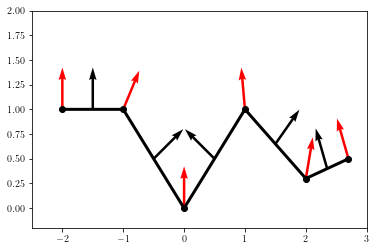

In [7]:
el_centers = 0.5 * (pts[1:] + pts[:-1])
plt.plot(pts[:,0], pts[:,1], 'k-o')
plt.quiver(el_centers[:,0], el_centers[:,1], el_normals[:,0], el_normals[:,1], scale=8)
plt.quiver(pts[:,0], pts[:,1], pt_normals[:,0], pt_normals[:,1], scale=8, color='r')
plt.xlim([-2.5, 3.0])
plt.ylim([-0.2, 2.0])
plt.show()

In [8]:
from scipy.interpolate import CubicSpline

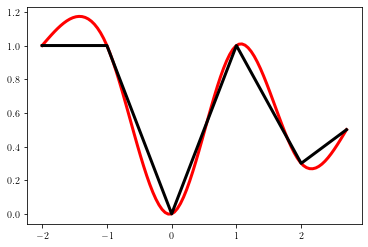

In [10]:
sp = CubicSpline(pts[:,0], pts[:,1], bc_type='natural')
xs = np.linspace(-2, 2.7, 100)
plt.plot(xs, sp(xs), 'r-')
plt.plot(pts[:,0], pts[:,1], 'k-')

### If we really want to have a sharp corner in a $C^1$ mesh, just refine!

In [12]:
def refine(pts):
    out = []
    for i in range(pts.shape[0] - 1):
        out.append(pts[i])
        out.append(0.5 * (pts[i] + pts[i+1]))
    out.append(pts[-1])
    return np.array(out)

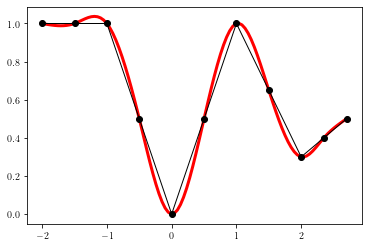

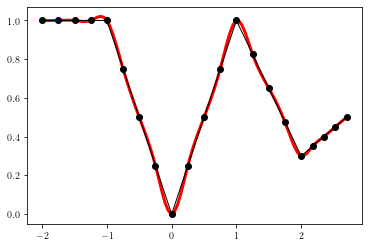

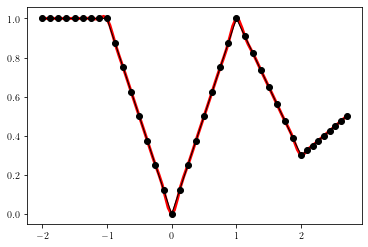

In [17]:
refined = pts
for i in range(3):
    refined = refine(refined)
    sp = CubicSpline(refined[:,0], refined[:,1], bc_type='natural')
    xs = np.linspace(-2, 2.7, 100)
    plt.plot(xs, sp(xs), 'r-')
    plt.plot(refined[:,0], refined[:,1], 'k-o', linewidth=1)
    plt.show()

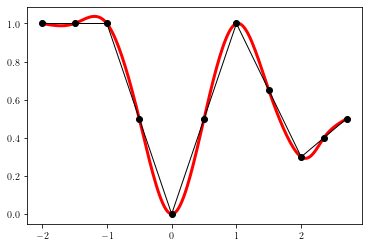

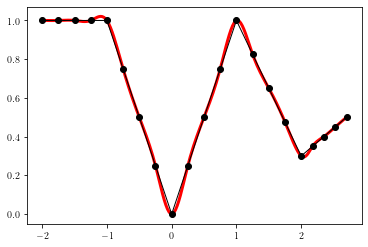

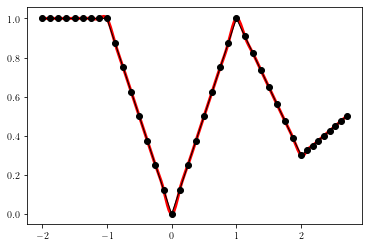

In [20]:
refined = pts
for i in range(3):
    refined = refine(refined)
    xhat_els = np.linspace(-1, 1, refined.shape[0])
    spx = CubicSpline(xhat_els, refined[:,0], bc_type='natural')
    spy = CubicSpline(xhat_els, refined[:,1], bc_type='natural')
    xhat = np.linspace(-1, 1, 200)
    plt.plot(spx(xhat), spy(xhat), 'r-')
    plt.plot(refined[:,0], refined[:,1], 'k-o', linewidth=1)
    plt.show()